In [1]:
from pyscenic.rss import regulon_specificity_scores

Regulon Specificity Scores --> RSS definition was introduced in 2018 here more information: https://www.sciencedirect.com/science/article/pii/S2211124718316346

In [8]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text
import re
import numpy as np
import matplotlib as mpl

In [ ]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [3]:
adata_scenic = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/CD4/CD4_res06_cariplo.h5ad")

In [4]:
auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx_CD4_imputed.csv",header=0,sep=",")

In [25]:
tmp1_pos =  tmp1.loc[:, tmp1.columns.str.contains(r'[+]', flags=re.IGNORECASE, regex=True)]
tmp1_neg = tmp1.loc[:, tmp1.columns.str.contains(r'[-]', flags=re.IGNORECASE, regex=True)]

In [30]:
tmp1_pos_c = pd.merge(adata_scenic.obs['desc_0.6'],tmp1_pos,left_index=True, right_index=True)
tmp1_neg_c = pd.merge(adata_scenic.obs['desc_0.6'],tmp1_neg,left_index=True, right_index=True)

### Split Dataframe in up and down module

In [12]:
tmp2 = pd.merge(adata_scenic.obs['TumorType'],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [13]:
tmp3 = pd.merge(adata_scenic.obs[['desc_0.6','TumorType']],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [32]:
tmp1_pos_c = tmp1_pos_c.set_index(['desc_0.6'])

In [33]:
tmp1_neg_c = tmp1_neg_c.set_index(['desc_0.6'])

In [20]:
#tmp2 = tmp2.set_index(['TumorType'])

In [28]:
#tmp3 = auc_mtx.set_index([adata_scenic.obs[['desc_0.6','TumorType']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)])

# Regulon specificity scores (RSS) 

In [34]:
rss_cellType_tmp1_pos_c = regulon_specificity_scores( tmp1_pos_c, tmp1_pos_c.index)
rss_cellType_tmp1_neg_c = regulon_specificity_scores( tmp1_neg_c, tmp1_neg_c.index)

In [42]:
rss_cellType_tmp1_pos_c.T.dropna().to_csv("/home/spuccio/data/positive_regulons_cluster.csv",sep="\t",header=True, index=True)
rss_cellType_tmp1_neg_c.T.dropna().to_csv("/home/spuccio/data/negative_regulons_cluster.csv",sep="\t",header=True, index=True)

### RSS panel plot with all cell types (POSITIVE)

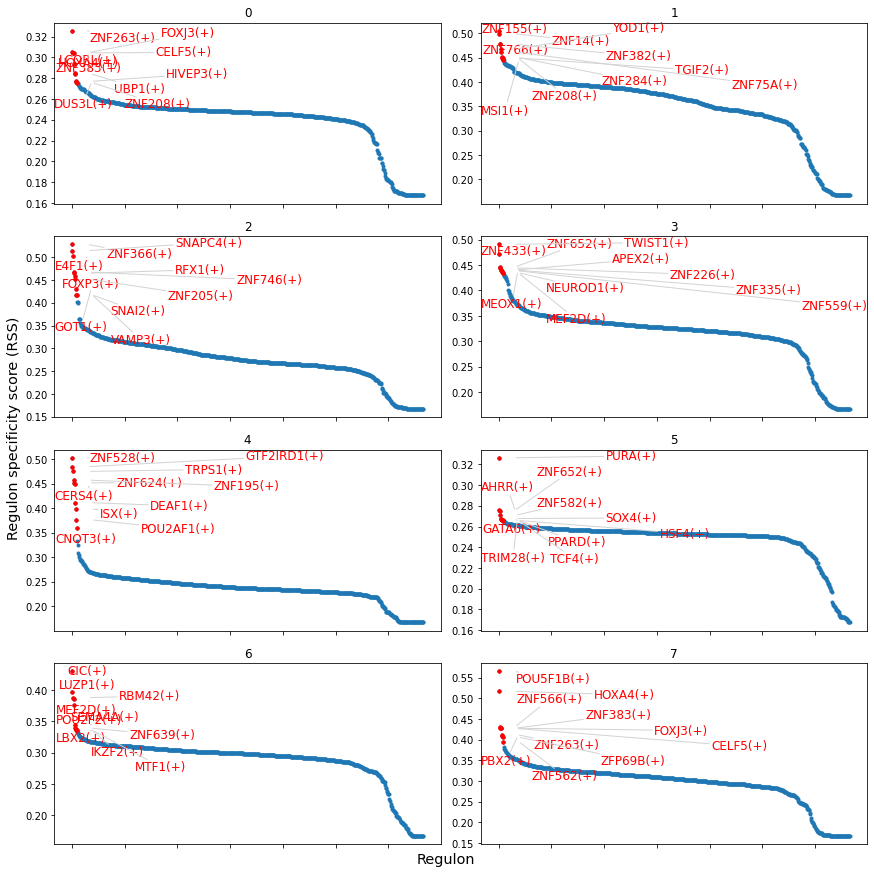

In [44]:
from adjustText import adjust_text
cats = sorted(list(set(tmp1_pos_c.index)))
fig = plt.figure(figsize=(12, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_pos_c.T[c]
    ax = fig.add_subplot(4,2,num)
    plot_rss(rss_cellType_tmp1_pos_c, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_imputed1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### RSS panel plot with all cell types (NEGATIVE)

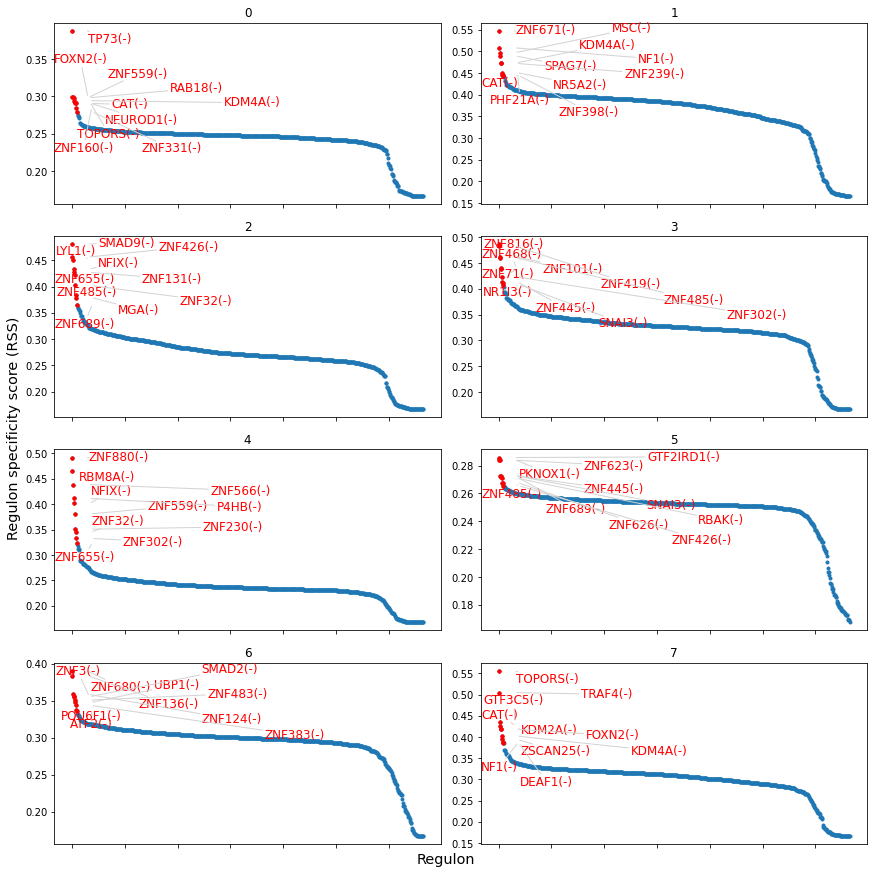

In [45]:
from adjustText import adjust_text
cats = sorted(list(set(tmp1_neg_c.index)))
fig = plt.figure(figsize=(12, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1_neg_c.T[c]
    ax = fig.add_subplot(4,2,num)
    plot_rss(rss_cellType_tmp1_neg_c, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/Imputed_cluster_negative/regulon_imputed1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Select the top 10 regulons from each cell type (POSITIVE)

In [58]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType_tmp1_pos_c.T[c].sort_values(ascending=False)[:10].index)
    )
topreg = list(set(topreg))

In [59]:
auc_mtx_Z = pd.DataFrame( index=tmp1_pos_c.index )
for col in list(tmp1_pos_c.columns):
    auc_mtx_Z[ col ] = ( tmp1_pos_c[col] - tmp1_pos_c[col].mean()) / tmp1_pos_c[col].std(ddof=0)

### Generate a heatmap for positive predicted regulon module network

In [61]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in tmp1_pos_c.index ]

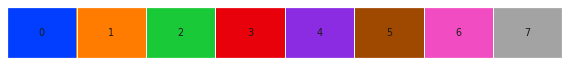

In [62]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/regulon_color_scale_imputed.pdf", dpi=600, bbox_inches = "tight")

In [63]:
auc_mtx_Z[topreg]

,MTF1(+),TCF4(+),TRIM28(+),ZNF366(+),SNAPC4(+),PURA(+),SNAI2(+),UBP1(+),GATA6(+),POU2AF1(+),...,APEX2(+),CERS4(+),ZNF284(+),SOX4(+),RFX1(+),ISX(+),RBM42(+),PPARD(+),MEOX1(+),HSF4(+)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,0.784923,1.710917,-0.511420,-0.390181,-0.354904,-0.289640,-0.327225,-0.940579,-0.599260,-0.738248,...,2.219283,-0.399665,0.087859,0.626421,-0.444185,-0.608249,1.546146,-0.431531,2.202790,0.550538
1,0.840412,-0.527389,-1.236028,-0.390181,-0.354904,-0.289640,-0.778774,1.541214,-0.821937,0.439455,...,0.043336,-0.399665,0.509510,-0.171313,-0.444185,0.855864,-1.020557,-0.285324,0.024735,-1.135364
3,0.309295,0.414825,-0.321908,-0.390181,-0.354904,-0.289640,-0.018957,0.626869,-0.280200,-0.811502,...,0.839815,-0.399665,1.060900,0.255757,0.004657,-0.099381,0.612109,-0.476106,0.821986,-0.175533
1,-0.649886,-0.940429,0.982387,-0.390181,-0.354904,-0.289640,-0.175262,0.163760,0.038860,-0.062055,...,-1.114431,-0.399665,0.585191,0.271873,-0.444185,-0.608249,-1.020557,0.681067,-1.134154,0.628457
3,1.442873,1.495084,0.124005,-0.390181,-0.354904,-0.289640,1.057813,-0.821832,1.195452,-0.614279,...,1.061515,-0.399665,-1.133848,1.395954,-0.444185,-0.608249,1.432239,-0.527814,1.043901,1.241190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,-1.513942,-0.783759,1.458027,-0.390181,-0.354904,0.847293,-0.778774,1.279972,-0.133964,-0.726978,...,-1.139065,-0.399665,0.531133,0.827870,2.154921,-0.608249,-0.337115,1.003791,-1.158811,0.539912
3,0.166607,1.759123,2.138043,3.044484,0.765869,7.953121,1.752504,-1.166196,1.913337,0.309851,...,1.463860,0.235072,-1.133848,1.641720,0.630947,-0.608249,0.908267,1.766919,1.446635,1.705167
5,-0.697449,-0.232673,1.220207,-0.390181,-0.354904,0.619906,-0.301175,2.075571,0.251567,-0.687533,...,-0.432909,-0.399665,-0.636516,0.638508,0.338679,-0.608249,0.847517,1.454893,-0.451971,0.309694


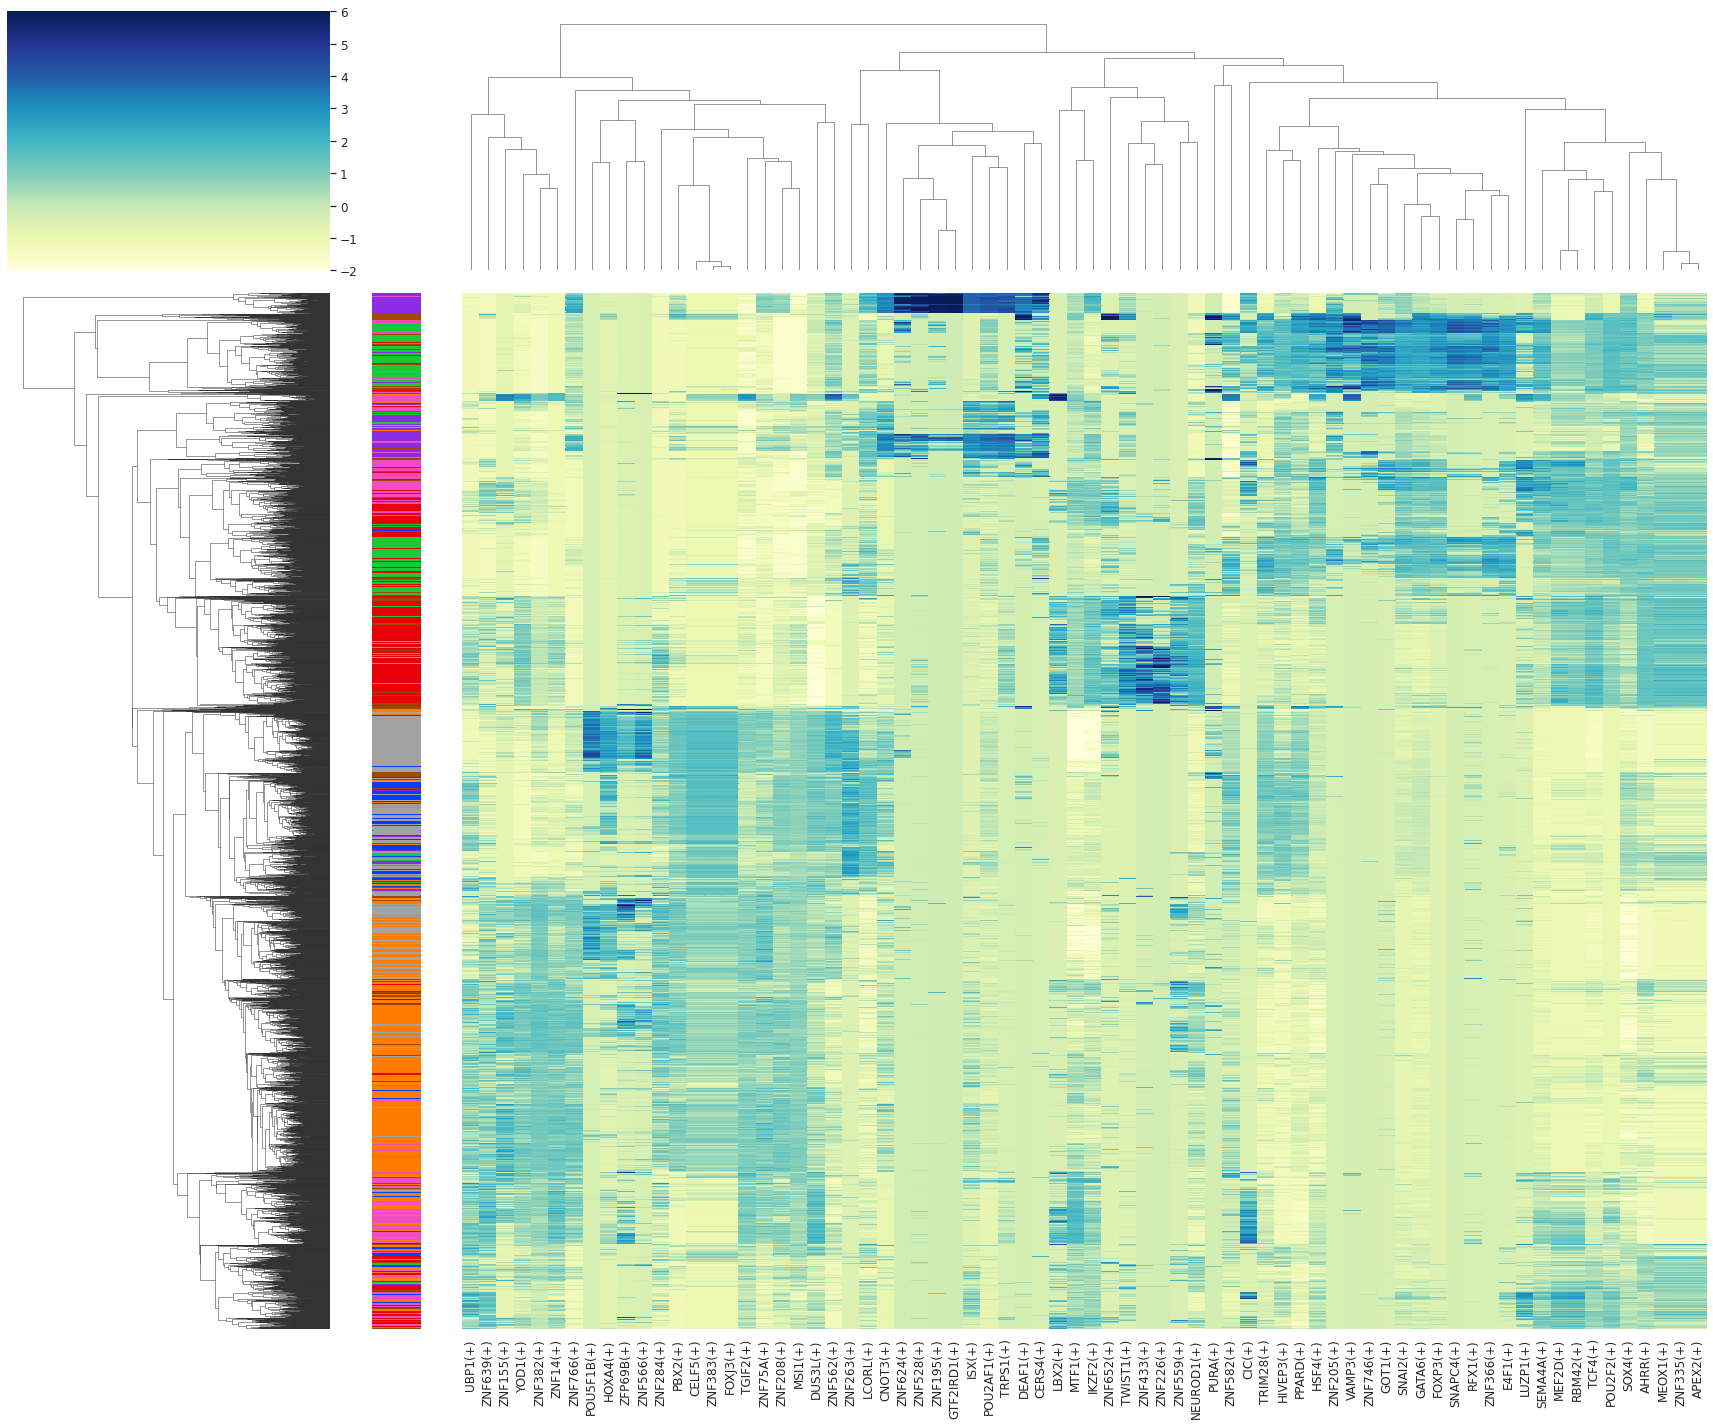

In [64]:
sns.set(font_scale=1.1)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(24,20) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/home/spuccio/data/Imputed_cluster_positive/heatmap.pdf", dpi=600, bbox_inches = "tight")

### Select the top 10 regulons from each cell type (NEGATIVE)

In [74]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType_tmp1_neg_c.T[c].sort_values(ascending=False)[:10].index)
    )
topreg = list(set(topreg))

In [76]:
auc_mtx_Z = pd.DataFrame( index=tmp1_neg_c.index )
for col in list(tmp1_neg_c.columns):
    auc_mtx_Z[ col ] = ( tmp1_neg_c[col] - tmp1_neg_c[col].mean()) / tmp1_neg_c[col].std(ddof=0)

### Generate a heatmap for negative predicted regulon module network

In [77]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in tmp1_neg_c.index ]

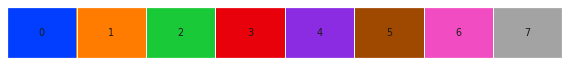

In [78]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/home/spuccio/data/Imputed_cluster_negative/regulon_color_scale_imputed.pdf", dpi=600, bbox_inches = "tight")

In [79]:
auc_mtx_Z[topreg]

,ZNF559(-),ZNF32(-),ZNF331(-),ZNF623(-),ATF2(-),NFIX(-),SMAD9(-),ZNF419(-),P4HB(-),ZNF383(-),...,RAB18(-),RBAK(-),NR5A2(-),ZNF483(-),TOPORS(-),SPAG7(-),ZNF136(-),ZNF3(-),ZNF398(-),ZNF239(-)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
3,-0.547701,-0.352647,-0.776614,-0.130835,-0.148049,-0.448353,-0.522024,1.610088,-0.369912,-0.592881,...,-0.776988,1.174800,-0.594206,0.083299,-0.568339,-1.089756,0.742055,0.853760,-0.694645,-0.058250
1,-0.547701,-0.352647,-1.235692,-0.130835,-0.770101,-0.448353,-0.522024,-0.089406,-0.369912,1.351919,...,-0.776988,0.548358,0.395942,-0.765839,-0.568339,0.836554,-0.990030,-0.264957,-0.694645,1.754367
3,-0.547701,-0.352647,0.448627,-0.130835,0.142839,-0.448353,-0.522024,-0.768134,-0.369912,0.689859,...,-0.776988,0.524719,-0.172175,-0.038704,-0.568339,-0.423331,-0.110425,0.609677,-0.694645,-0.029132
1,1.737665,-0.352647,1.348170,-0.130835,0.500854,-0.448353,-0.522024,-0.768134,-0.369912,-0.592881,...,1.972878,-0.716345,0.217391,-0.409592,1.658378,-0.374686,-0.990030,0.040148,-0.694645,-0.717053
3,-0.547701,-0.352647,-0.692863,-0.130835,0.317371,-0.448353,-0.522024,2.048322,-0.369912,-0.592881,...,-0.776988,1.450592,-0.602321,0.737233,-0.568339,-1.089756,1.497663,0.711378,-0.694645,1.117403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.778160,-0.352647,1.022473,-0.130835,-0.139099,-0.448353,-0.522024,-0.768134,-0.115253,-0.482538,...,2.108803,0.721713,-0.112658,-0.399832,1.638931,0.384163,-0.463042,0.175750,-0.694645,-1.099232
3,-0.547701,-0.352647,1.152752,-0.130835,-0.336007,-0.066544,1.778063,1.604743,0.158995,-0.592881,...,1.481457,0.768992,-1.503193,-0.209507,-0.568339,-1.089756,1.013299,-0.719224,-0.694645,-1.310340
5,1.257913,-0.352647,1.199280,-0.130835,0.702238,-0.448353,-0.522024,-0.768134,-0.369912,1.807085,...,2.903441,0.946287,-0.475171,-0.263189,0.637394,-0.583856,-0.036802,0.704598,-0.694645,-1.273942


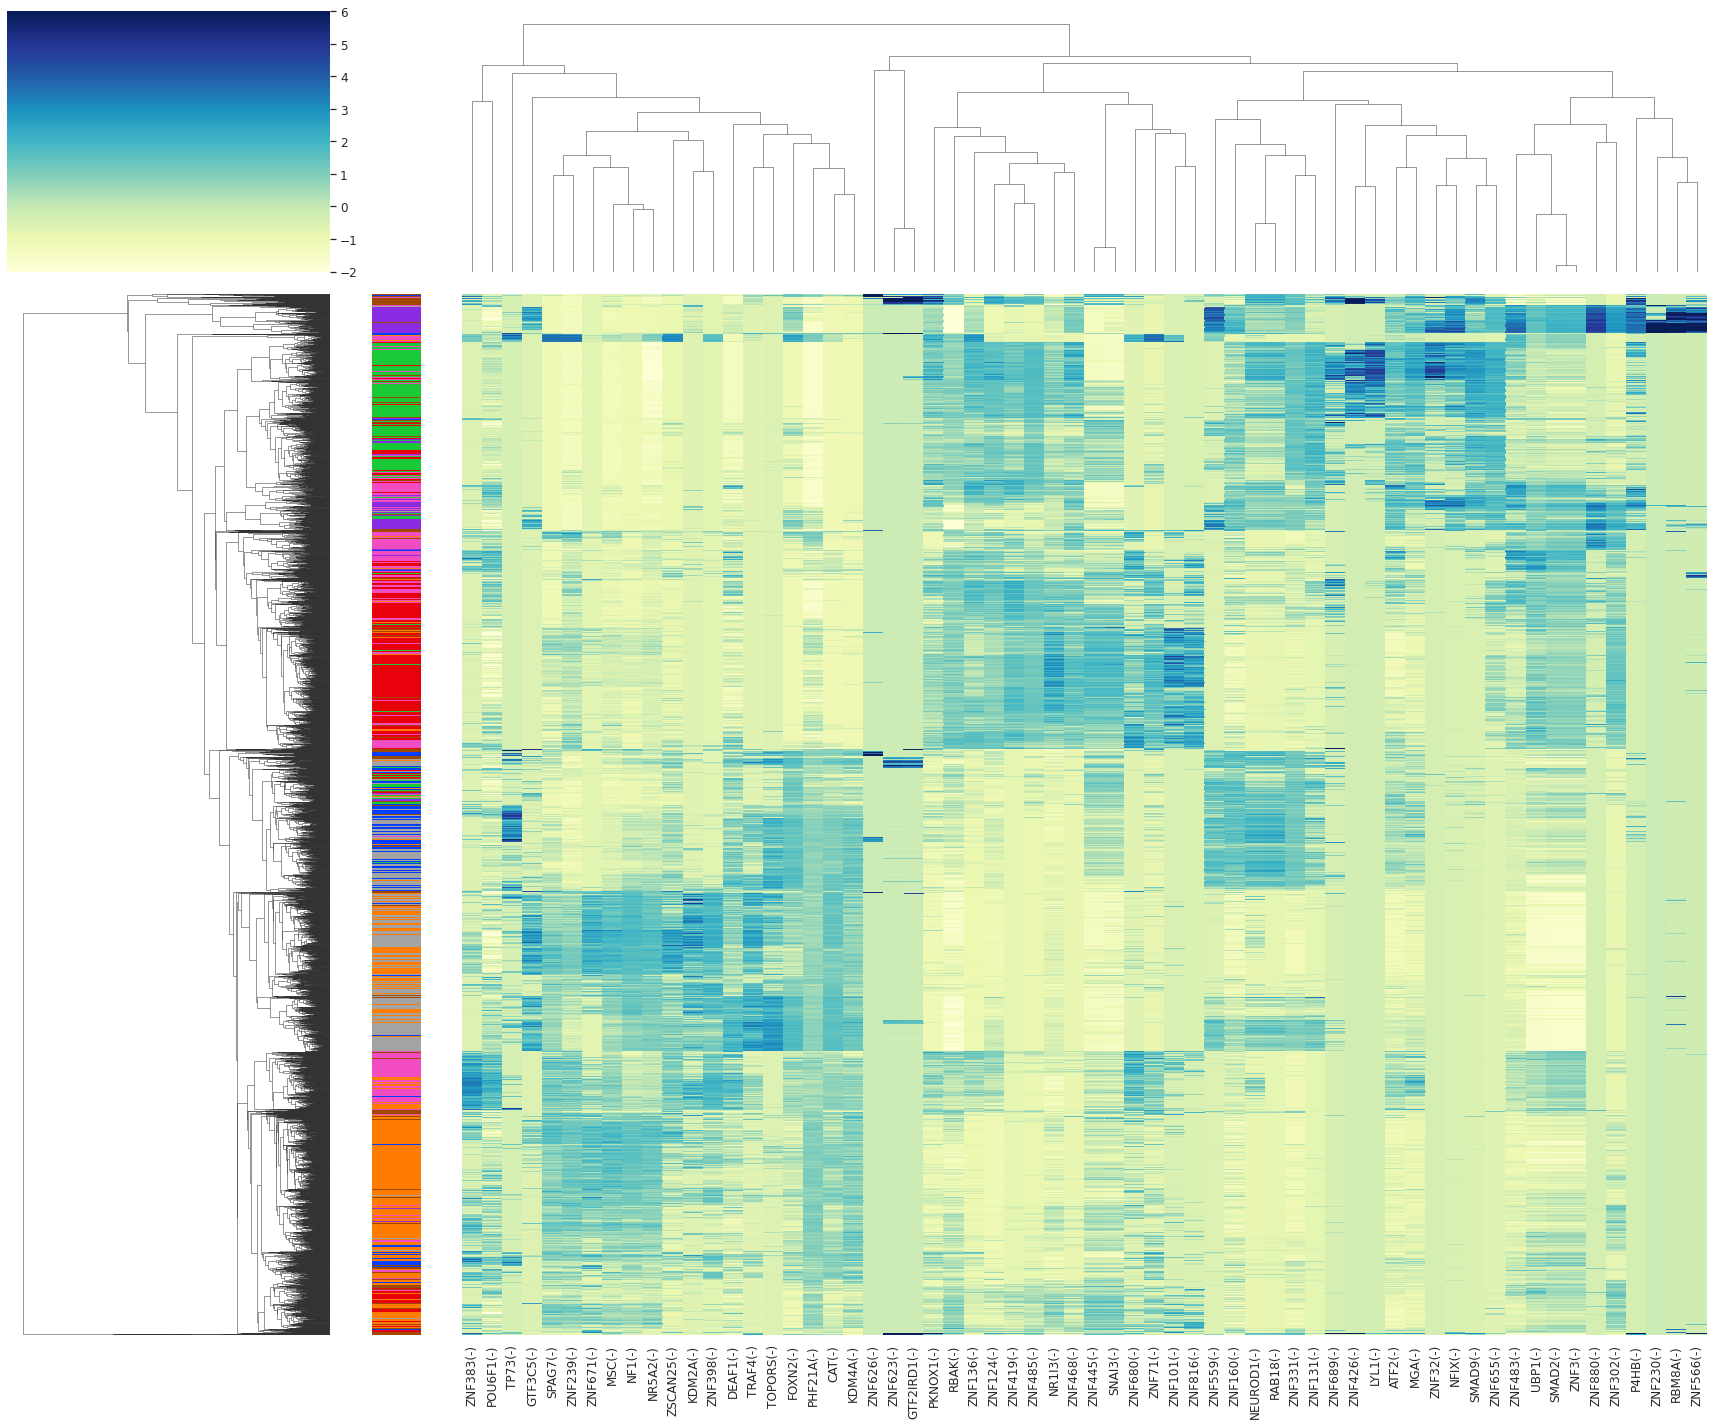

In [80]:
sns.set(font_scale=1.1)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(24,20) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/home/spuccio/data/Imputed_cluster_negative/heatmap.pdf", dpi=600, bbox_inches = "tight")